Edible or Poisonous: Mushroom Species Identification using Machine Learning


In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, OneClassSVM, NuSVC
from sklearn.decomposition import PCA
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv, MetricVisualizer
from scipy.stats import randint
from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv("data/mushrooms.csv")

In [3]:
data.shape

(8124, 23)

In [4]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data['stalk-root'] = data['stalk-root'].apply(lambda x: 'm' if '?' in x else x)

In [8]:
selected_columns_for_eda = data.loc[:, ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-color', 'stalk-shape', 'stalk-root', 'ring-number', 'population', 'habitat']] 

In [9]:
custom_palette = ['#FF1493', '#4169E1']

In [10]:
def count_plot_feature_vs_class(features: list):
    for feature in features:
        plt.figure(figsize=(8, 6))
        count_plot = sns.countplot(x=data[feature], hue='class', data=data, palette=custom_palette)
        
        for plot_container in count_plot.containers:
            count_plot.bar_label(plot_container, label_type='edge', color='black')
        
        plt.title(f'{feature} vs. Mushroom Class', fontsize=14, fontweight='bold', color='green')
        plt.xlabel(feature, fontsize=12, fontweight='bold', color='green')
        plt.ylabel('Count', fontsize=12, fontweight='bold', color='green')
        plt.xticks(rotation=45)
    
        # figure_plot = count_plot.get_figure()
        # figure_plot.savefig(f'{feature}_vs_class.png')
        plt.tight_layout()
        plt.show()
        plt.close()

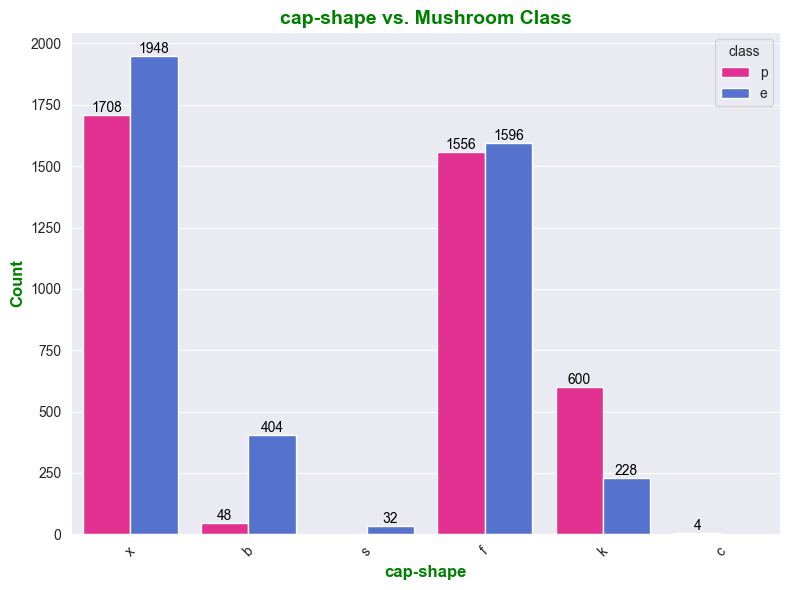

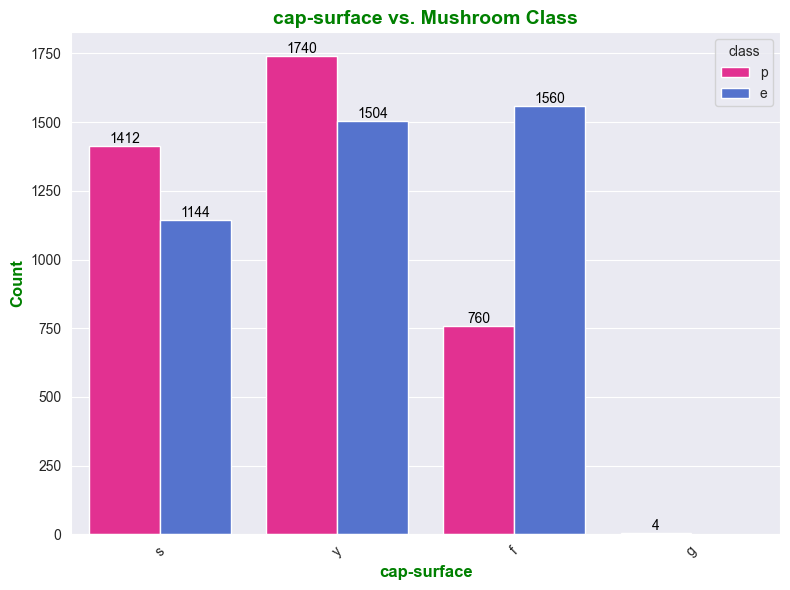

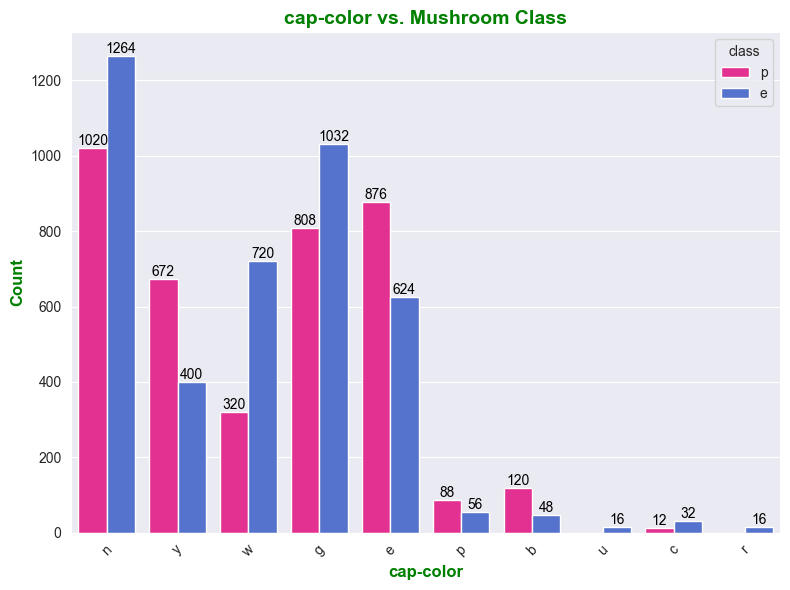

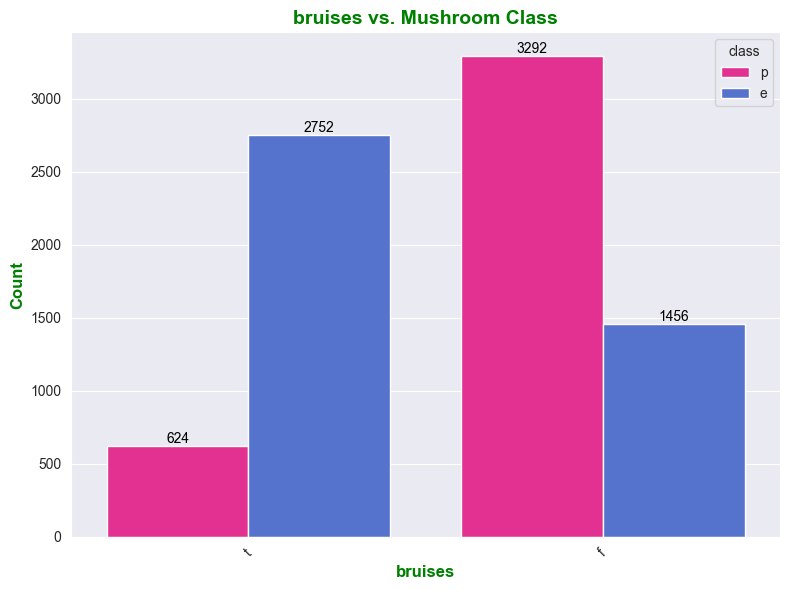

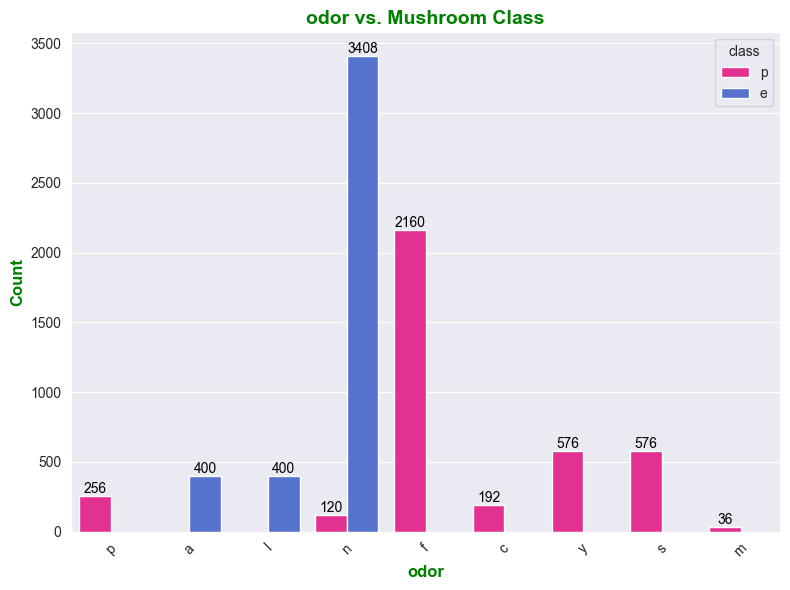

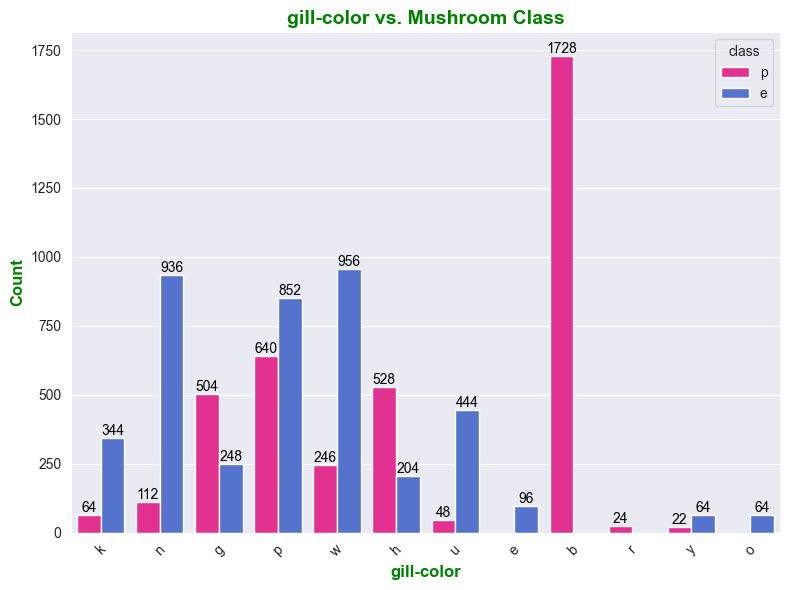

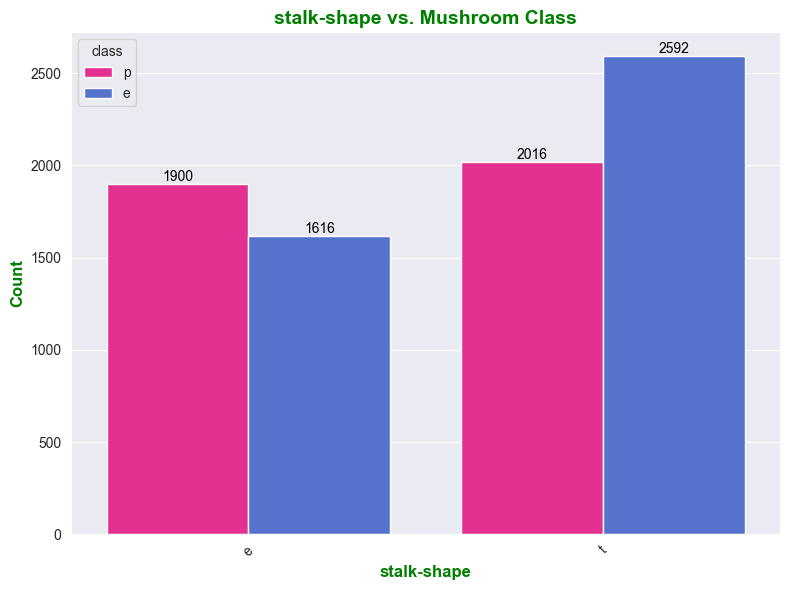

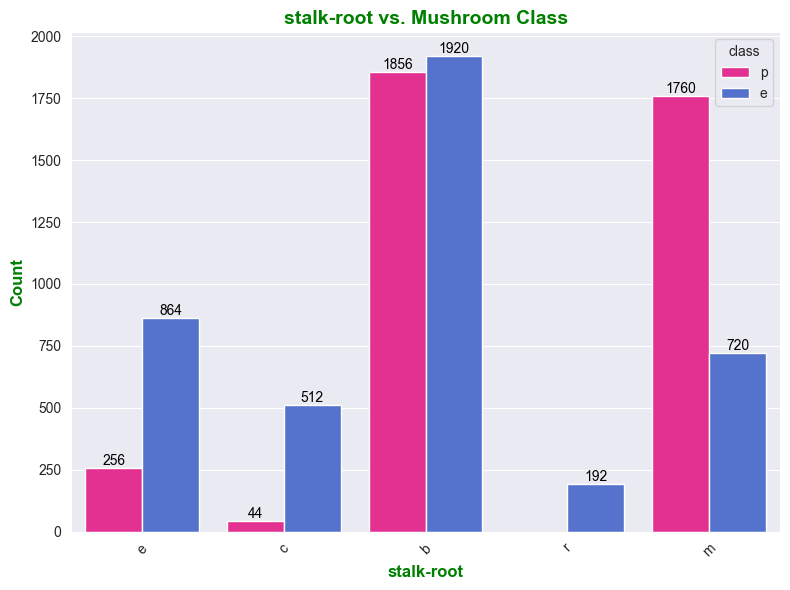

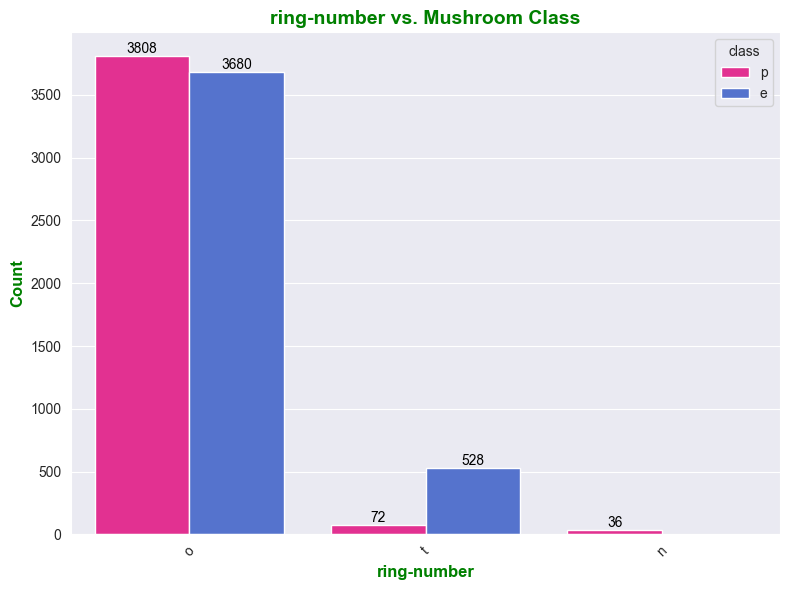

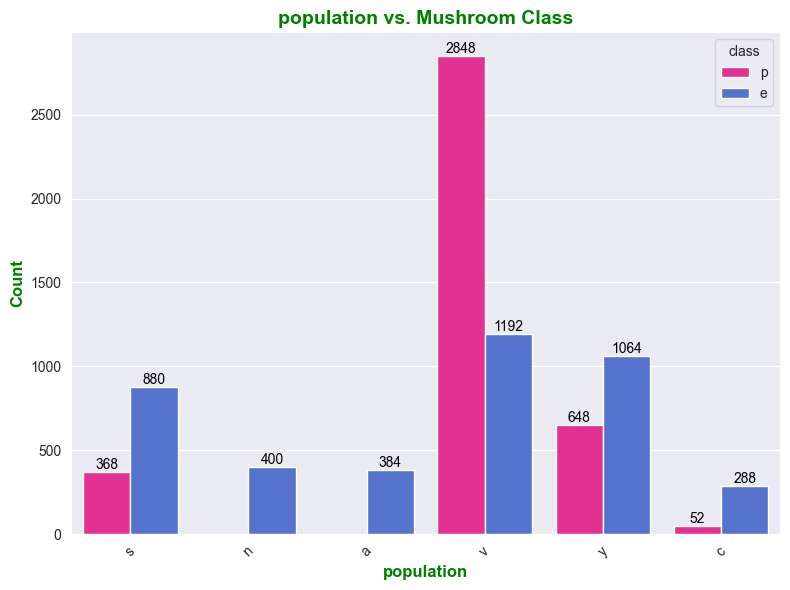

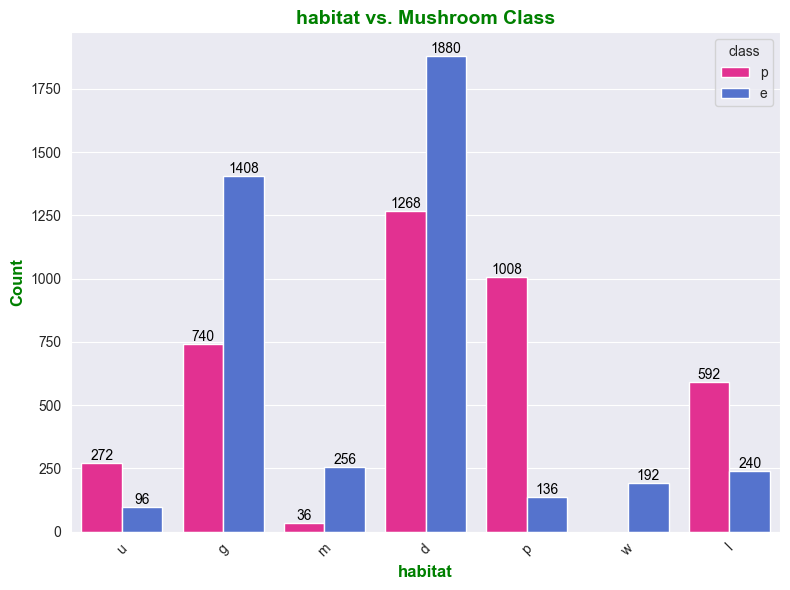

In [11]:
count_plot_feature_vs_class(features=selected_columns_for_eda)

In [12]:
def box_plot_feature_vs_class(features: list):
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    
    custom_colors = {'e': '#4169E1', 'p': '#FF1493'}
    
    for column in features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='class', hue='class', y=column, data=data, palette=custom_colors, legend=False)
        plt.title(f"Box Plot of {column} by Class")
        plt.xlabel("Class")
        plt.ylabel(column)
        plt.show()

<Figure size 1000x600 with 0 Axes>

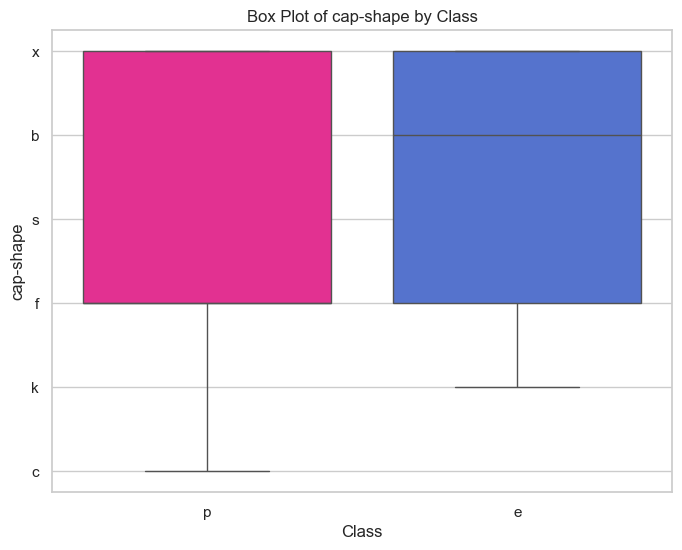

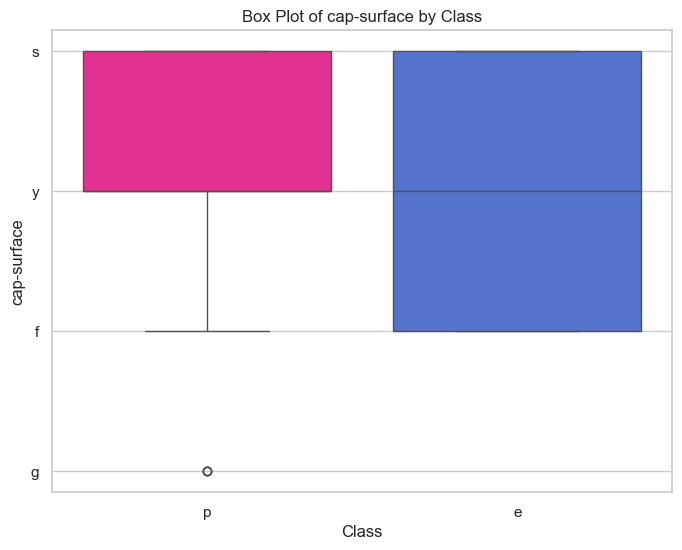

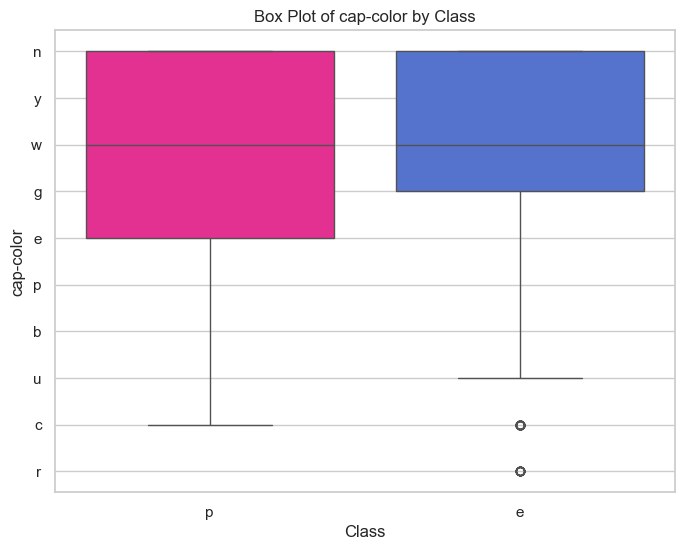

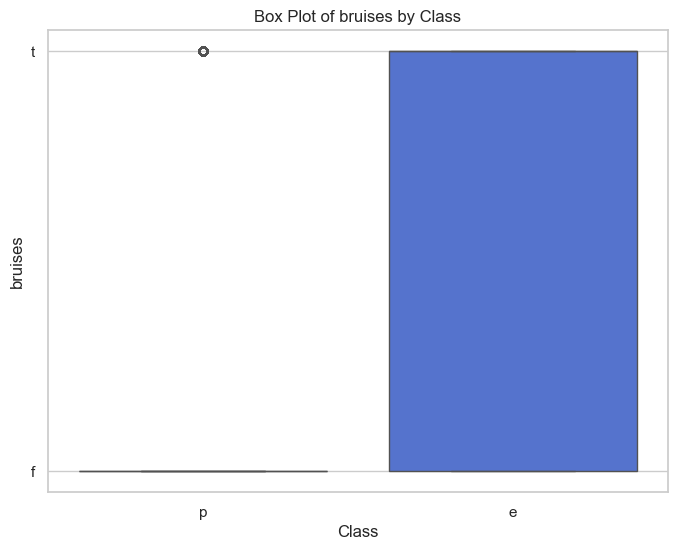

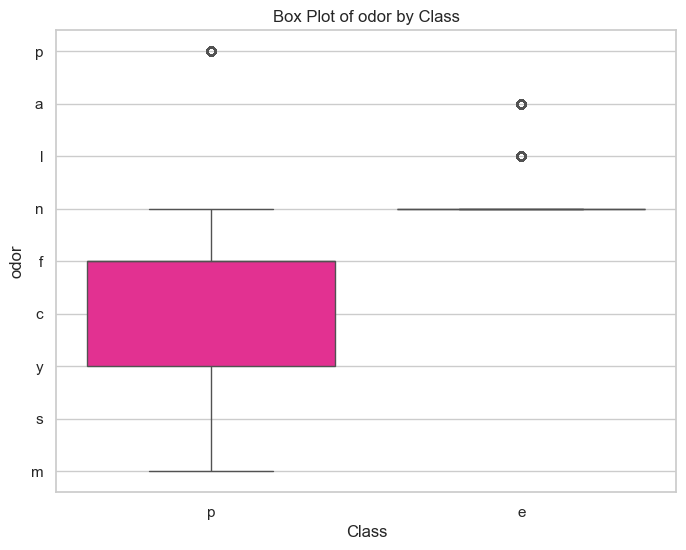

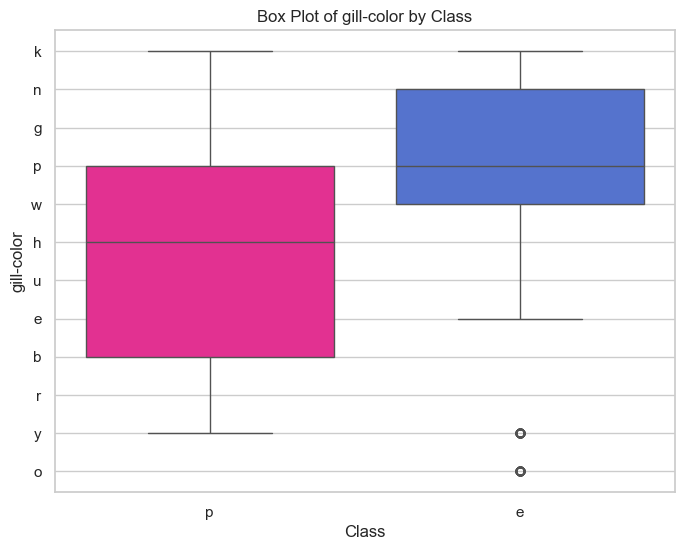

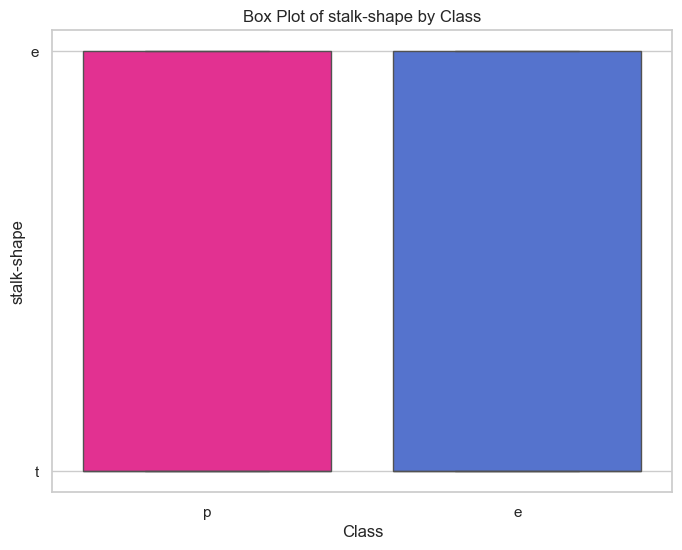

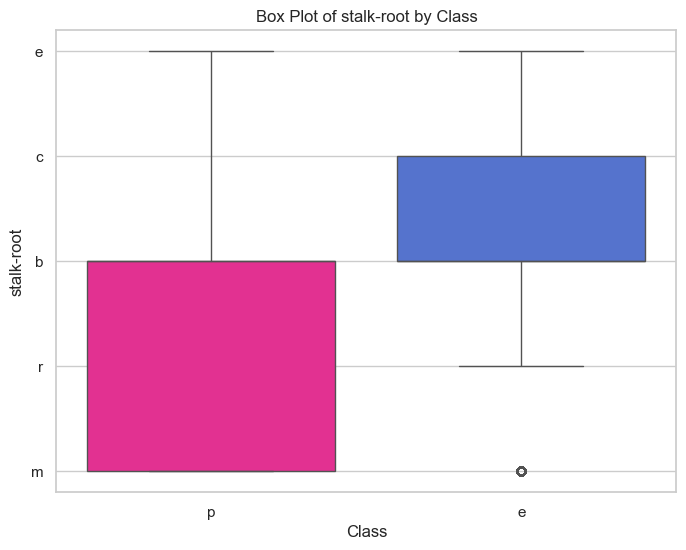

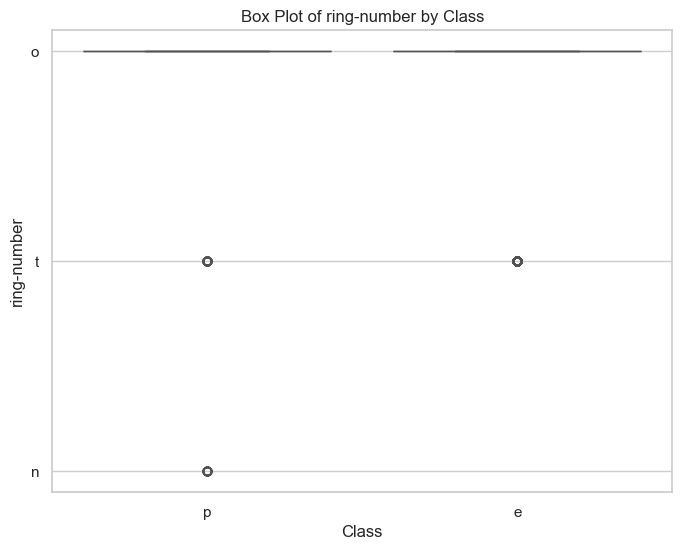

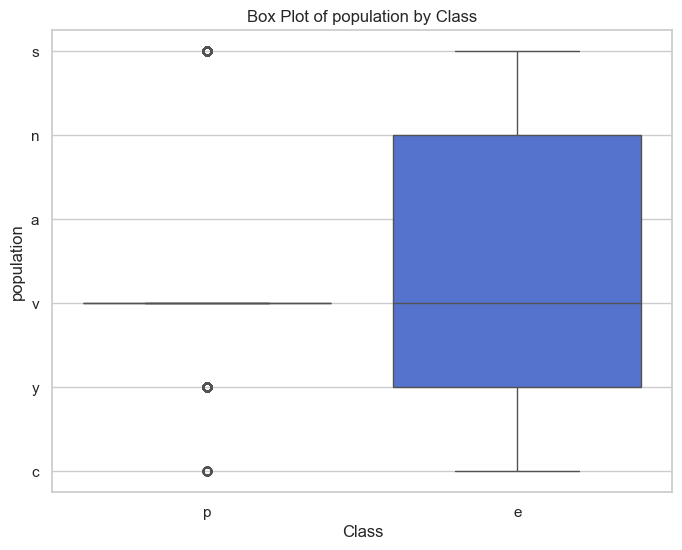

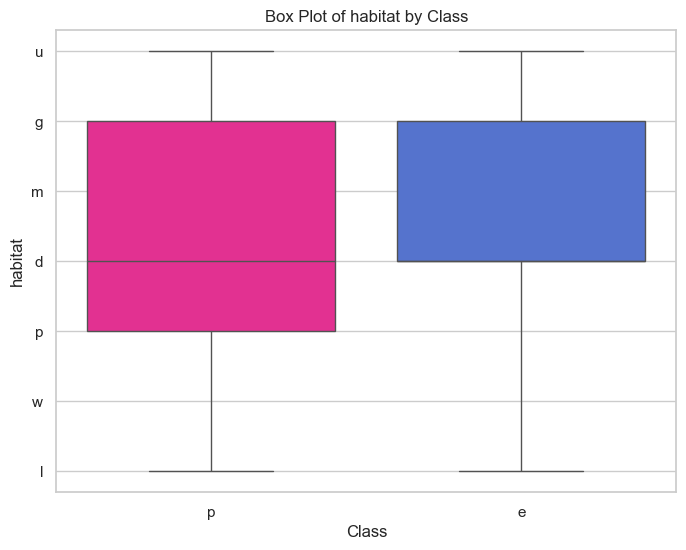

In [13]:
box_plot_feature_vs_class(features=selected_columns_for_eda)

In [14]:
def handle_non_standard_values(value: str, standard_values: list):
    if value not in standard_values:
        return 'Others'
    return value

In [15]:
data['cap-shape'].value_counts()

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

In [16]:
data['cap-shape'] = data['cap-shape'].apply(lambda x: handle_non_standard_values(x, ['x', 'f', 'k']))

In [17]:
data['cap-shape'].value_counts()

cap-shape
x         3656
f         3152
k          828
Others     488
Name: count, dtype: int64

In [18]:
data['cap-surface'].value_counts()

cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

In [19]:
data['cap-surface'] = data['cap-surface'].apply(lambda x: handle_non_standard_values(x, ['y', 's']))

In [20]:
data['cap-surface'].value_counts()

cap-surface
y         3244
s         2556
Others    2324
Name: count, dtype: int64

In [21]:
data['cap-color'].value_counts()

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

In [22]:
data['cap-color'] = data['cap-color'].apply(lambda x: handle_non_standard_values(x, ['n', 'g', 'e', 'y', 'w']))

In [23]:
data['cap-color'].value_counts()

cap-color
n         2284
g         1840
e         1500
y         1072
w         1040
Others     388
Name: count, dtype: int64

In [24]:
data['odor'].value_counts()

odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

In [25]:
data['odor'] = data['odor'].apply(lambda x: handle_non_standard_values(x, ['n','f','y','s']))

In [26]:
data['gill-color'].value_counts()

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64

In [27]:
data['gill-color'] = data['gill-color'].apply(lambda x: handle_non_standard_values(x, ['b','p','w','n','g','h','u','k']))

In [28]:
data['gill-color'].value_counts()

gill-color
b         1728
p         1492
w         1202
n         1048
g          752
h          732
u          492
k          408
Others     270
Name: count, dtype: int64

In [29]:
data['spore-print-color'].value_counts()

spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64

In [30]:
data['spore-print-color'] = data['spore-print-color'].apply(lambda x: handle_non_standard_values(x, ['w','n','k','h']))

In [31]:
data['spore-print-color'].value_counts()

spore-print-color
w         2388
n         1968
k         1872
h         1632
Others     264
Name: count, dtype: int64

In [32]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64

In [33]:
data['stalk-color-above-ring'] = data['stalk-color-above-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [34]:
data['stalk-color-above-ring'].value_counts()

stalk-color-above-ring
w         4464
p         1872
g          576
n          448
b          432
Others     332
Name: count, dtype: int64

In [35]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64

In [36]:
data['stalk-color-below-ring'] = data['stalk-color-below-ring'].apply(lambda x: handle_non_standard_values(x, ['w','p','g','n', 'b']))

In [37]:
data['stalk-color-below-ring'].value_counts()

stalk-color-below-ring
w         4384
p         1872
g          576
n          512
b          432
Others     348
Name: count, dtype: int64

In [38]:
data.drop(columns= ['gill-attachment', 'gill-spacing', 'veil-type',], inplace= True)

In [39]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [40]:
encoder = LabelEncoder()

In [41]:
encoder.fit(data['bruises'])
encoder.classes_ = np.array(['f', 't'])
data['bruises'] = encoder.transform(data['bruises'])

In [42]:
data['bruises']

0       1
1       1
2       1
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: bruises, Length: 8124, dtype: int32

In [43]:
data['ring-number']

0       o
1       o
2       o
3       o
4       o
       ..
8119    o
8120    o
8121    o
8122    o
8123    o
Name: ring-number, Length: 8124, dtype: object

In [44]:
encoder.fit(data['ring-number'])
encoder.classes_ = np.array(['n', 'o', 't'])
data['ring-number'] = encoder.transform(data['ring-number'])

In [45]:
data['ring-number']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: ring-number, Length: 8124, dtype: int32

In [46]:
encoder.fit(data['class'])
encoder.classes_ = np.array(['p', 'e'])
data['class'] = encoder.transform(data['class'])

In [47]:
data['class']

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int32

In [48]:
category_columns = list(data.select_dtypes(include = ['object']).columns)

In [49]:
category_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'odor',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [50]:
data = pd.get_dummies(data, columns=category_columns, dtype=int)

In [51]:
data.dtypes

class               int32
bruises             int32
ring-number         int32
cap-shape_Others    int32
cap-shape_f         int32
                    ...  
habitat_l           int32
habitat_m           int32
habitat_p           int32
habitat_u           int32
habitat_w           int32
Length: 86, dtype: object

In [52]:
X = data.drop('class', axis=1)
y = data['class']

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   bruises                        8124 non-null   int32
 1   ring-number                    8124 non-null   int32
 2   cap-shape_Others               8124 non-null   int32
 3   cap-shape_f                    8124 non-null   int32
 4   cap-shape_k                    8124 non-null   int32
 5   cap-shape_x                    8124 non-null   int32
 6   cap-surface_Others             8124 non-null   int32
 7   cap-surface_s                  8124 non-null   int32
 8   cap-surface_y                  8124 non-null   int32
 9   cap-color_Others               8124 non-null   int32
 10  cap-color_e                    8124 non-null   int32
 11  cap-color_g                    8124 non-null   int32
 12  cap-color_n                    8124 non-null   int32
 13  cap-color_w       

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [55]:
X.shape ,X_train.shape, X_test.shape

((8124, 85), (5686, 85), (2438, 85))

In [56]:
y.shape, y_train.shape, y_test.shape

((8124,), (5686,), (2438,))

In [57]:
y_train.value_counts(normalize= True).max()

0.5179387970453746

In [58]:
y_test.value_counts(normalize= True).max()

0.5180475799835931

In [59]:
baseline_log_reg = LogisticRegression(random_state=42)

In [60]:
baseline_log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [61]:
train_pred_log_reg = baseline_log_reg.predict(X_train)
test_pred_log_reg = baseline_log_reg.predict(X_test)

In [62]:
baseline_log_reg.score(X_test, y_test)

0.9995898277276456

In [63]:
train_accuracy_log_reg = accuracy_score(y_train, train_pred_log_reg)

In [64]:
train_accuracy_log_reg

0.9994723883221949

In [65]:
test_accuracy_log_reg = accuracy_score(y_test, test_pred_log_reg)

In [66]:
test_accuracy_log_reg

0.9995898277276456

In [67]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=None, save_path=None):
    if cmap is None:
        cmap = ['#FF1493', '#4169E1']
    sns.heatmap(cm, annot=True, cmap=sns.color_palette(cmap), fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()

In [68]:
cm_baseline_train = confusion_matrix(y_train, train_pred_log_reg)

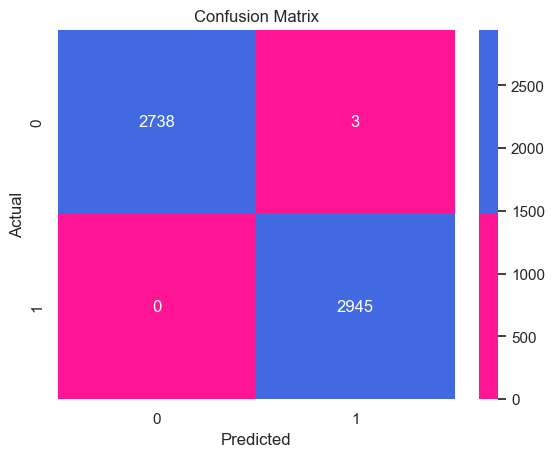

In [69]:
plot_confusion_matrix(cm_baseline_train)

In [70]:
cm_baseline_test = confusion_matrix(y_test, test_pred_log_reg)

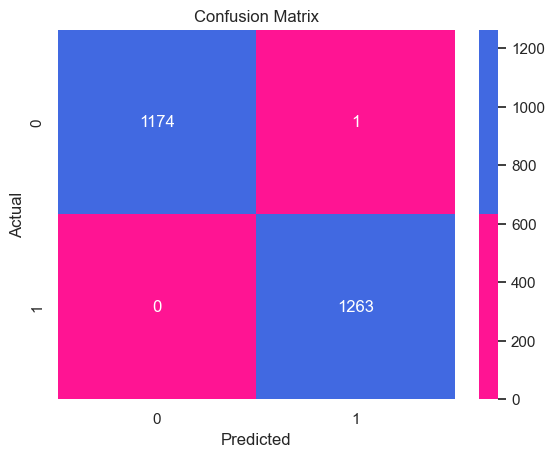

In [71]:
plot_confusion_matrix(cm_baseline_test)

In [72]:
train_baseline_report = classification_report(y_train, train_pred_log_reg, output_dict=True)

In [73]:
pd.DataFrame(train_baseline_report).transpose()

,precision,recall,f1-score,support
0,1.000000,0.998906,0.999452,2741.000000
1,0.998982,1.000000,0.999491,2945.000000
accuracy,0.999472,0.999472,0.999472,0.999472
macro avg,0.999491,0.999453,0.999472,5686.000000
weighted avg,0.999473,0.999472,0.999472,5686.000000


In [74]:
test_baseline_report = classification_report(y_test, test_pred_log_reg, output_dict=True)

In [75]:
pd.DataFrame(test_baseline_report).transpose()

,precision,recall,f1-score,support
0,1.000000,0.999149,0.999574,1175.00000
1,0.999209,1.000000,0.999604,1263.00000
accuracy,0.999590,0.999590,0.999590,0.99959
macro avg,0.999604,0.999574,0.999589,2438.00000
weighted avg,0.999590,0.999590,0.999590,2438.00000


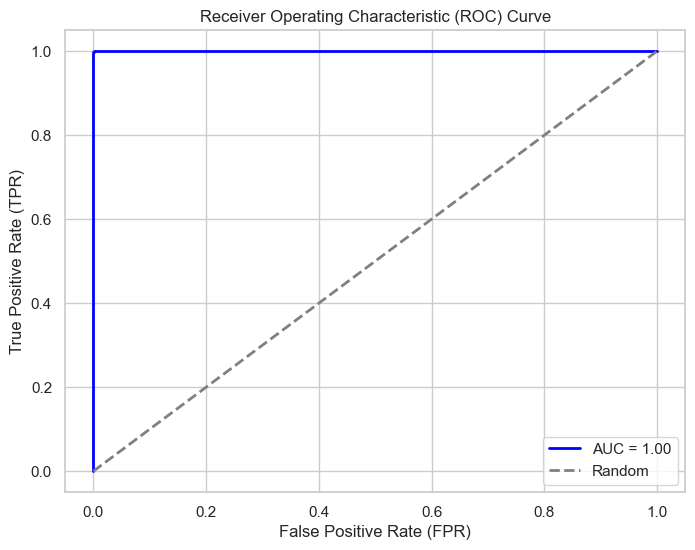

In [76]:
y_scores = baseline_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
# plt.savefig(f'roc_curve.png')
plt.show()

In [77]:
param_grid_c = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [78]:
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=200), param_grid_c, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [79]:
best_C = grid_search_log_reg.best_params_['C']

In [80]:
best_C

10

In [81]:
optimized_log_reg = LogisticRegression(C=best_C, max_iter=200)

In [82]:
optimized_log_reg.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=200)

In [83]:
train_pred_optimized_log_reg = optimized_log_reg.predict(X_train)
test_pred_optimized_log_reg = optimized_log_reg.predict(X_test)

In [84]:
optimized_log_reg.score(X_test, y_test)

1.0

In [85]:
train_accuracy_optimized_log_reg = accuracy_score(y_train, train_pred_optimized_log_reg)

In [86]:
train_accuracy_optimized_log_reg

1.0

In [87]:
test_accuracy_optimized_log_reg = accuracy_score(y_test, test_pred_optimized_log_reg)

In [88]:
test_accuracy_optimized_log_reg

1.0

In [89]:
cm_optimized_train = confusion_matrix(y_train, train_pred_optimized_log_reg)

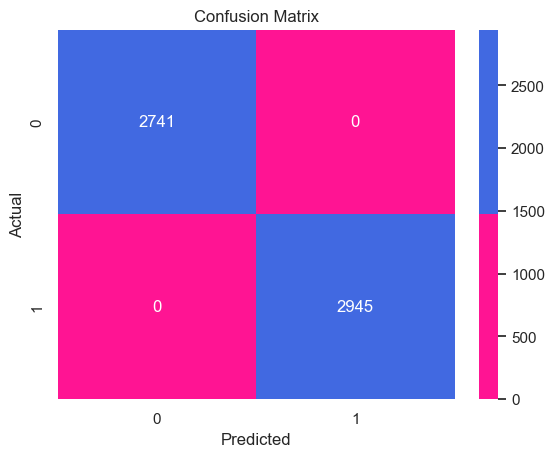

In [90]:
plot_confusion_matrix(cm_optimized_train)

In [91]:
cm_optimized_test = confusion_matrix(y_test, test_pred_optimized_log_reg)

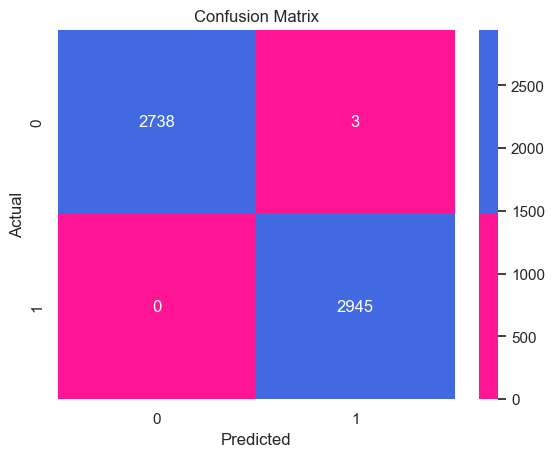

In [92]:
plot_confusion_matrix(cm_baseline_train)

In [93]:
train_optimized_report = classification_report(y_train, train_pred_optimized_log_reg, output_dict=True)

In [94]:
pd.DataFrame(train_optimized_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,2741.0
1,1.0,1.0,1.0,2945.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,5686.0
weighted avg,1.0,1.0,1.0,5686.0


In [95]:
test_optimized_report = classification_report(y_test, test_pred_optimized_log_reg, output_dict=True)

In [96]:
pd.DataFrame(test_optimized_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1175.0
1,1.0,1.0,1.0,1263.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


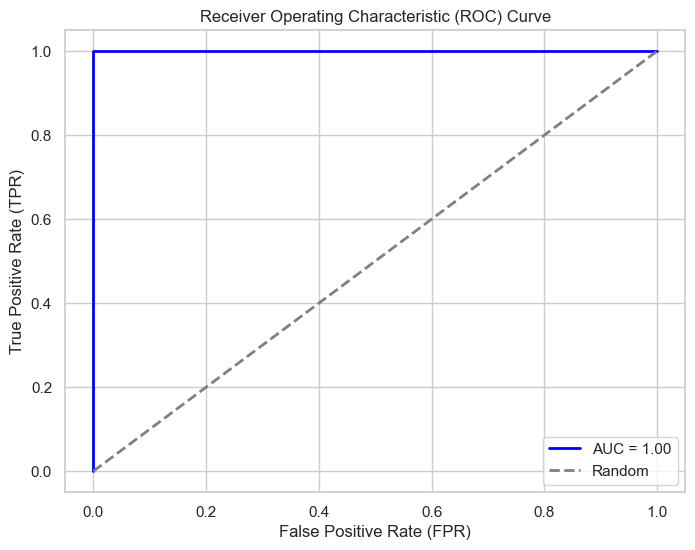

In [97]:
y_scores = optimized_log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
# plt.savefig(f'roc_curve_optimized.png')
plt.show()

In [98]:
param_tree_cls = {
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [99]:
baseline_tree_cls = DecisionTreeClassifier(random_state=42)

In [100]:
random_search = RandomizedSearchCV(baseline_tree_cls, param_distributions=param_tree_cls, n_iter=20,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025DB5941A50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025DB5940F40>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025DB7F70190>},
                   random_state=42, scoring='accuracy')

In [101]:
best_params = random_search.best_params_

In [102]:
best_params

{'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 16}

In [103]:
random_search.best_score_

1.0

In [104]:
best_tree = random_search.best_estimator_

In [105]:
best_tree

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=16,
                       random_state=42)

In [106]:
y_pred_best_tree = best_tree.predict(X_test)
test_accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)

In [107]:
test_accuracy_best_tree

1.0

In [108]:
cm_best_tree_test = confusion_matrix(y_test, y_pred_best_tree)

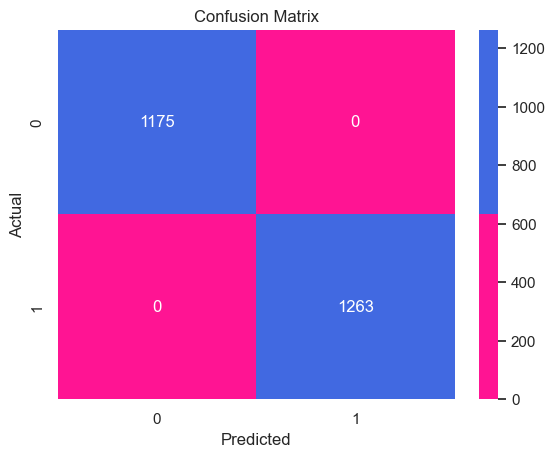

In [109]:
plot_confusion_matrix(cm_best_tree_test)

In [110]:
test_best_tree_cls_report = classification_report(y_test, y_pred_best_tree, output_dict=True)

In [111]:
pd.DataFrame(test_best_tree_cls_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1175.0
1,1.0,1.0,1.0,1263.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


In [112]:
def calculate_feature_importance(tree, x):
    importance = tree.feature_importances_
    
    feature_importance_df = pd.DataFrame({'Feature Names': x.columns, 'Importance': importance})
    return feature_importance_df[feature_importance_df['Importance'] > 0].sort_values(by='Importance', ascending=False)

In [113]:
calculate_feature_importance(best_tree, X)

,Feature Names,Importance
17,odor_n,0.617394
15,odor_Others,0.176593
21,gill-size_n,0.089330
32,stalk-shape_t,0.040152
81,habitat_m,0.017887
71,spore-print-color_w,0.016745
45,stalk-surface-below-ring_y,0.014674
51,stalk-color-above-ring_w,0.013660
33,stalk-root_b,0.005669
57,stalk-color-below-ring_w,0.004445


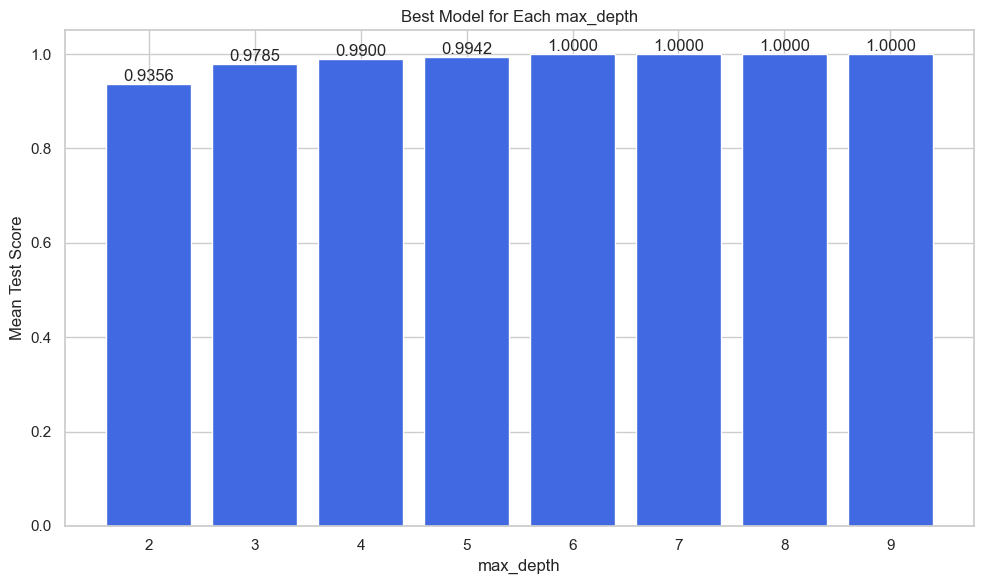

In [114]:
results = random_search.cv_results_

max_depth_values = results['param_max_depth']
mean_test_scores = results['mean_test_score']
params = results['params']

best_scores = {}
for depth, score, param in zip(max_depth_values, mean_test_scores, params):
    if depth not in best_scores or score > best_scores[depth][0]:
        best_scores[depth] = (score, param)

depths = list(range(2, 10))
scores = [best_scores.get(depth, (None, None))[0] for depth in depths]

plt.figure(figsize=(10, 6))
plt.bar(depths, scores, color='#4169E1')
plt.title("Best Model for Each max_depth")
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
for i, score in enumerate(scores):
    if score is not None:
        plt.text(depths[i], score, f"{score:.4f}", ha='center', va='bottom')

plt.xticks(depths)
plt.tight_layout()
# plt.savefig('decision_tree_bars.png', bbox_inches='tight')
plt.show()

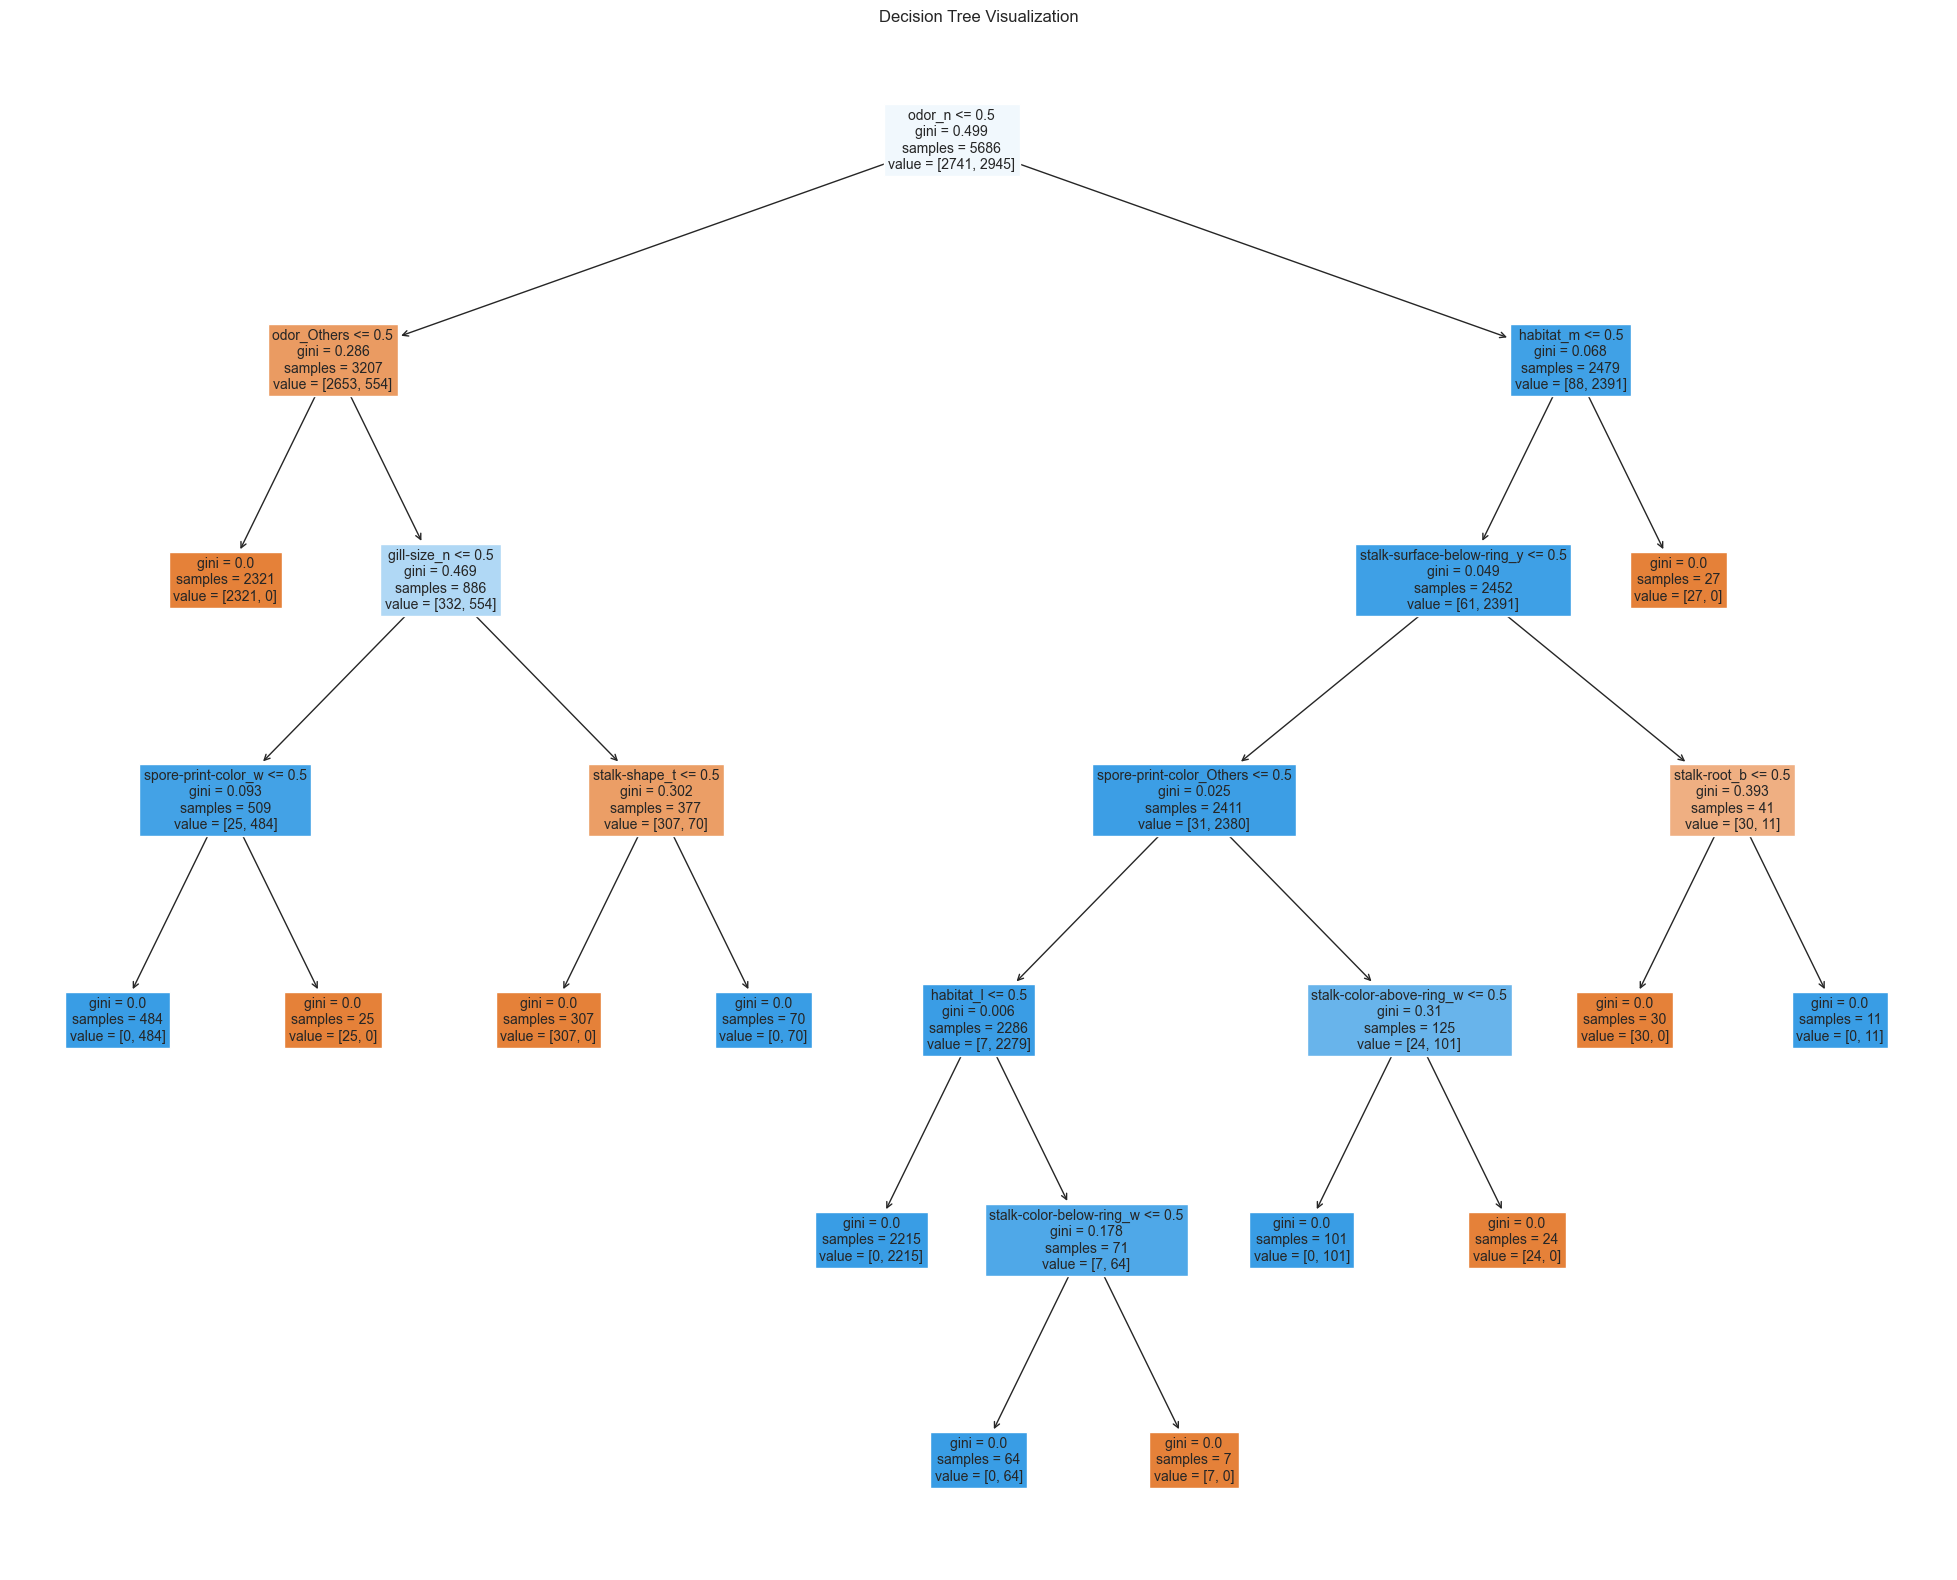

In [115]:
plt.figure(figsize=(25, 20))
plot_tree(best_tree, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
# plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

In [116]:
param_grid_random_forest_cls = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [2, 5, 10, 15], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

In [117]:
baseline_random_forest_cls = RandomForestClassifier()

In [118]:
# grid_search = GridSearchCV(estimator=baseline_random_forest_cls, param_grid=param_grid_random_forest_cls, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

In [119]:
# best_params_random_forest_cls = grid_search.best_params_

In [120]:
# best_params_random_forest_cls

In [121]:
# best_random_forest_cls = RandomForestClassifier(**best_params_random_forest_cls)
# best_random_forest_cls.fit(X_train, y_train)

In [122]:
# y_pred = best_random_forest_cls.predict(X_test)

In [123]:
# test_accuracy_best_random_forest_cls = accuracy_score(y_test, y_pred)

In [124]:
# test_accuracy_best_random_forest_cls

In [125]:
# cm_best_random_forest_cls_test = confusion_matrix(y_test, y_pred)

In [126]:
# plot_confusion_matrix(cm_best_random_forest_cls_test, save_path='test.png')

In [127]:
# test_best_random_forest_report = classification_report(y_test, y_pred, output_dict=True)

In [128]:
# pd.DataFrame(test_best_random_forest_report).transpose()

In [129]:
# calculate_feature_importance(best_random_forest_cls, X)

In [130]:
param_grid_lgbm_cls = {
    'num_leaves': [10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2]
}

In [131]:
lgbm_classifier = LGBMClassifier(force_row_wise=True)

In [132]:
grid_search_lgbm_cls = GridSearchCV(estimator=lgbm_classifier, param_grid=param_grid_lgbm_cls, cv=3, scoring='accuracy')
grid_search_lgbm_cls.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1963, number of negative: 1827
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 3790, number of used features: 81
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517942 -> initscore=0.071799
[LightGBM] [Info] Start training from score 0.071799
[LightGBM] [Info] Number of positive: 1964, number of negative: 1827
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 3791, number of used features: 83
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.518069 -> initscore=0.072308
[LightGBM] [Info] Start training from score 0.072308
[LightGBM] [Info] Number of positive: 1963, number of negative: 1828
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 3791, number of used features: 82
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517805 -> initscore=0.071251
[LightGBM] [Info] Start training from score 0.071251
[LightGBM] [Info] Numb

GridSearchCV(cv=3, estimator=LGBMClassifier(force_row_wise=True),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'num_leaves': [10, 15, 20]},
             scoring='accuracy')

In [133]:
best_params_lgbm_cls = grid_search_lgbm_cls.best_params_

In [134]:
best_params_lgbm_cls

{'learning_rate': 0.05, 'num_leaves': 10}

In [135]:
best_model_lgbm_cls = grid_search_lgbm_cls.best_estimator_

In [136]:
best_model_lgbm_cls

LGBMClassifier(force_row_wise=True, learning_rate=0.05, num_leaves=10)

In [137]:
y_pred_lgbm_cls = best_model_lgbm_cls.predict(X_test)
accuracy_score(y_test, y_pred_lgbm_cls)

1.0

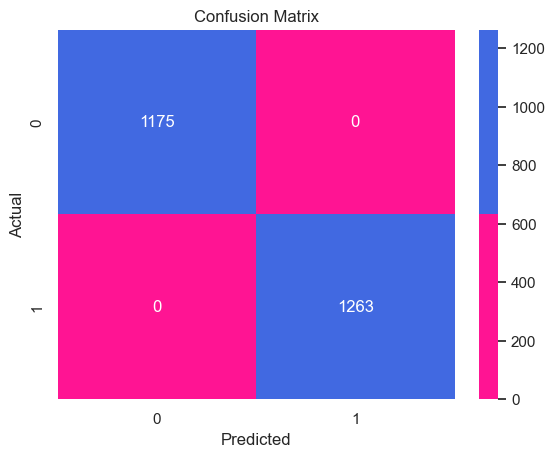

In [138]:
cm_lgbm_cls = confusion_matrix(y_test, y_pred_lgbm_cls)
plot_confusion_matrix(cm_lgbm_cls)

In [139]:
test_lgbm_cls_report = classification_report(y_test, y_pred_lgbm_cls, output_dict=True)
pd.DataFrame(test_best_tree_cls_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1175.0
1,1.0,1.0,1.0,1263.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


In [140]:
calculate_feature_importance(best_model_lgbm_cls, X)

,Feature Names,Importance
0,bruises,179
20,gill-size_b,140
67,spore-print-color_Others,100
17,odor_n,100
15,odor_Others,84
31,stalk-shape_e,76
45,stalk-surface-below-ring_y,59
73,population_c,25
81,habitat_m,22
35,stalk-root_e,20


In [141]:
y_pred_proba_lgbm_cls = best_model_lgbm_cls.predict_proba(X_test)
log_loss_lgbm_cls = log_loss(y_test, y_pred_proba_lgbm_cls)
print(f"Log Loss: {log_loss_lgbm_cls:.4f}")

Log Loss: 0.0038


In [168]:
param_grid_cat_boost = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
}

In [160]:
catboost = CatBoostClassifier()

In [163]:
grid_search_cat_boost = GridSearchCV(estimator=catboost, param_grid=param_grid_cat_boost, cv=3, scoring='accuracy')
grid_search_cat_boost.fit(X_train, y_train)

0:	learn: 0.6710565	total: 4.62ms	remaining: 458ms
1:	learn: 0.6488373	total: 9.19ms	remaining: 450ms
2:	learn: 0.6204743	total: 13.8ms	remaining: 445ms
3:	learn: 0.6000903	total: 18.6ms	remaining: 446ms
4:	learn: 0.5799039	total: 23ms	remaining: 437ms
5:	learn: 0.5608281	total: 26.2ms	remaining: 410ms
6:	learn: 0.5357370	total: 30.7ms	remaining: 407ms
7:	learn: 0.5097700	total: 35.3ms	remaining: 406ms
8:	learn: 0.4859851	total: 41.1ms	remaining: 416ms
9:	learn: 0.4639626	total: 47.5ms	remaining: 428ms
10:	learn: 0.4458569	total: 52ms	remaining: 420ms
11:	learn: 0.4293801	total: 56.5ms	remaining: 415ms
12:	learn: 0.4183884	total: 60.9ms	remaining: 407ms
13:	learn: 0.4081479	total: 64ms	remaining: 393ms
14:	learn: 0.3899349	total: 68.3ms	remaining: 387ms
15:	learn: 0.3730166	total: 72.7ms	remaining: 381ms
16:	learn: 0.3601547	total: 77ms	remaining: 376ms
17:	learn: 0.3471529	total: 81.4ms	remaining: 371ms
18:	learn: 0.3311805	total: 85.7ms	remaining: 365ms
19:	learn: 0.3199715	total: 90

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025DB59E2DA0>,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [145]:
best_params_cat_boost = grid_search_cat_boost.best_params_

In [146]:
best_params_cat_boost

{'depth': 6, 'iterations': 100, 'learning_rate': 0.05}

In [147]:
best_score_cat_boost = grid_search_cat_boost.best_score_

In [148]:
best_score_cat_boost

1.0

In [149]:
best_cat_boost = grid_search_cat_boost.best_estimator_

In [172]:
y_pred_cat_boost = best_cat_boost.predict(X_test)
accuracy_score(y_test, y_pred_cat_boost)

1.0

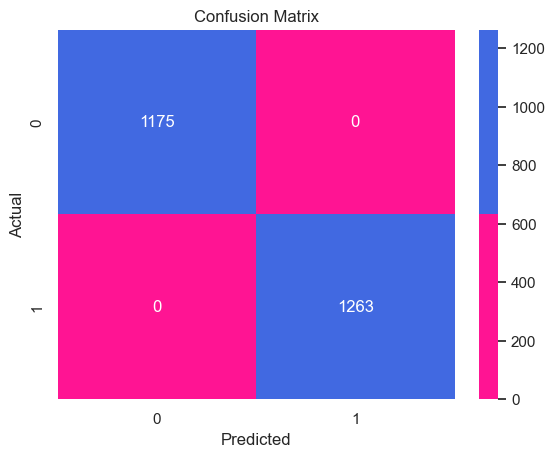

In [151]:
cm_cat_boost = confusion_matrix(y_test, y_pred_cat_boost)
plot_confusion_matrix(cm_cat_boost)

In [173]:
test_cat_boost_cls_report = classification_report(y_test, y_pred_cat_boost, output_dict=True)
pd.DataFrame(test_cat_boost_cls_report).transpose()

,precision,recall,f1-score,support
0,1.0,1.0,1.0,1175.0
1,1.0,1.0,1.0,1263.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,2438.0
weighted avg,1.0,1.0,1.0,2438.0


In [174]:
calculate_feature_importance(best_cat_boost, X)

,Feature Names,Importance
17,odor_n,4.936117e+01
34,stalk-root_c,6.142779e+00
0,bruises,5.962384e+00
16,odor_f,5.408953e+00
20,gill-size_b,4.172370e+00
45,stalk-surface-below-ring_y,3.916701e+00
31,stalk-shape_e,3.129656e+00
67,spore-print-color_Others,2.832975e+00
35,stalk-root_e,2.507748e+00
15,odor_Others,2.295554e+00


In [175]:
y_pred_proba_best_cat_boost = best_cat_boost.predict_proba(X_test)
log_loss_cat_boost = log_loss(y_test, y_pred_proba_best_cat_boost)
print(f"Log Loss: {log_loss_lgbm_cls:.4f}")

Log Loss: 0.0038


In [166]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

best_cat_boost.fit(train_pool, eval_set=test_pool)
res = best_cat_boost.calc_feature_statistics(train_pool, test_pool, feature=17, plot_file="best_cat_boost_odr_n.html")

0:	learn: 0.5863911	test: 0.5872451	best: 0.5872451 (0)	total: 4.8ms	remaining: 476ms
1:	learn: 0.4698009	test: 0.4701345	best: 0.4701345 (1)	total: 9.54ms	remaining: 467ms
2:	learn: 0.3677224	test: 0.3687024	best: 0.3687024 (2)	total: 14.5ms	remaining: 470ms
3:	learn: 0.2949484	test: 0.2953343	best: 0.2953343 (3)	total: 19.1ms	remaining: 458ms
4:	learn: 0.2352162	test: 0.2353092	best: 0.2353092 (4)	total: 23.7ms	remaining: 451ms
5:	learn: 0.1873931	test: 0.1874003	best: 0.1874003 (5)	total: 28.4ms	remaining: 444ms
6:	learn: 0.1600583	test: 0.1593665	best: 0.1593665 (6)	total: 32.8ms	remaining: 435ms
7:	learn: 0.1268606	test: 0.1260437	best: 0.1260437 (7)	total: 36.9ms	remaining: 425ms
8:	learn: 0.1044941	test: 0.1036491	best: 0.1036491 (8)	total: 41.5ms	remaining: 420ms
9:	learn: 0.0886308	test: 0.0879388	best: 0.0879388 (9)	total: 46ms	remaining: 414ms
10:	learn: 0.0767753	test: 0.0759730	best: 0.0759730 (10)	total: 50.6ms	remaining: 409ms
11:	learn: 0.0653610	test: 0.0644471	best: 0

In [180]:
param_grid_svm_cls = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

In [181]:
svm_classifier = SVC()

In [182]:
grid_search_svm_cls = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm_cls, cv=5, scoring='accuracy')
grid_search_svm_cls.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [183]:
best_params_svm_cls = grid_search_svm_cls.best_params_

In [184]:
best_params_svm_cls 

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [186]:
best_svm_cls = grid_search_svm_cls.best_estimator_

In [187]:
best_svm_cls

SVC(C=1, gamma=0.1, kernel='linear')

In [189]:
y_pred_best_svm_cls = best_svm_cls.predict(X_test)
accuracy_best_svm_cls = accuracy_score(y_test, y_pred_best_svm_cls)

In [190]:
accuracy_best_svm_cls

1.0

In [191]:
best_svm_cls.coef_

array([[-1.05052480e+00, -3.36013726e-01, -4.89707529e-05,
         4.53628450e-05, -9.25405088e-06,  1.28619588e-05,
        -5.54834006e-06,  1.14898664e-06,  4.39935342e-06,
        -1.45230092e-06, -3.46539063e-05,  1.39948686e-05,
        -2.13243724e-05,  1.33873438e-05,  3.00483673e-05,
         1.23997412e+00, -1.31405964e+00,  2.18983079e+00,
        -1.05784652e+00, -1.05789876e+00,  6.22695940e-01,
        -6.22695940e-01,  2.64562668e-01, -2.11574528e+00,
         2.64530336e-01,  2.64195560e-01,  2.64507126e-01,
         2.64560624e-01,  2.64596755e-01,  2.64196555e-01,
         2.64595653e-01, -1.68282849e+00,  1.68282849e+00,
        -1.74407993e+00,  5.53870651e-01, -2.00659620e-01,
        -6.03287067e-01,  1.99415597e+00,  4.77488234e-01,
        -9.50103055e-01,  4.77547310e-01, -4.93248929e-03,
         3.60147634e-01,  3.60208784e-01,  3.60156675e-01,
        -1.08051309e+00, -6.59416802e-02,  0.00000000e+00,
         0.00000000e+00,  1.98617936e-01, -6.64000771e-0

In [192]:
best_svm_cls.intercept_

array([0.61205039])

In [198]:
best_svm_cls.support_vectors_

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

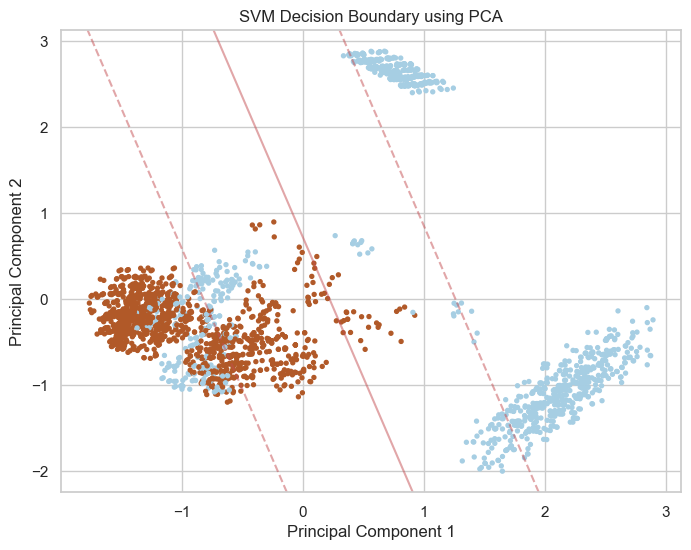

In [243]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

svm = SVC(kernel='linear', C=1, gamma=0.1)
svm.fit(X_train_pca, y_train)

X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=plt.cm.Paired, s=8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary using PCA')
plt.show()

In [215]:
nu_values = [0.1, 0.3, 0.5, 0.7]

for nu in nu_values:
    nu_svm = NuSVC(kernel='linear', nu=nu)
    nu_svm.fit(X_train, y_train)
    
    train_accuracy = nu_svm.score(X_train, y_train)
    test_accuracy = nu_svm.score(X_test, y_test)
    
    print(f"NuSVC with nu={nu}: Train accuracy - {train_accuracy:.4f}, Test accuracy - {test_accuracy:.4f}")

NuSVC with nu=0.1: Train accuracy - 0.9792, Test accuracy - 0.9820
NuSVC with nu=0.3: Train accuracy - 0.9552, Test accuracy - 0.9586
NuSVC with nu=0.5: Train accuracy - 0.9066, Test accuracy - 0.9048
NuSVC with nu=0.7: Train accuracy - 0.8911, Test accuracy - 0.8893


In [216]:
param_grid_nu_svc = {
    'nu': [0.1, 0.3, 0.5, 0.7],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

In [217]:
nusvm = NuSVC()

In [218]:
grid_search_nu_svc = GridSearchCV(nusvm, param_grid_nu_svc, cv=5)
grid_search_nu_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'nu': [0.1, 0.3, 0.5, 0.7]})

In [219]:
grid_search_nu_svc.best_params_

{'degree': 4, 'kernel': 'poly', 'nu': 0.1}

In [220]:
grid_search_nu_svc.best_score_

0.9998240985048372

In [257]:
one_class_svm = OneClassSVM(nu = 0.05)
one_class_svm.fit(X_train)
outliers = one_class_svm.predict(X_train)

In [258]:
sum(outliers == -1)

436

In [260]:
sum(outliers == -1) / len(X_train)

0.07667956384101302

In [261]:
outliers = one_class_svm.predict(X_test)

In [262]:
sum(outliers == -1)

279

In [263]:
sum(outliers == -1) / len(X_test)

0.11443806398687449